In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/omdena-time-series-analysis/data/Dhaka Tribune Complete Data.csv")

In [4]:
df.head()

,Unnamed: 0,Newspaper Name,Accident date,Header,News title,Deaths,Injured
0,0,Dhaka Tribune,Jun 26 2021,Two labourers killed in Dhaka road accident,2 killed in Dhaka road crash,2.0,2
1,1,Dhaka Tribune,Jun 23 2021,Three killed in Muktagacha road accident,Three killed in Muktagacha road...,3.0,0
2,2,Dhaka Tribune,Jun 19 2021,Truck-pickup van collision leaves 3 dead in Na...,Truck-pickup van collision leaves 3...,3.0,0
3,3,Dhaka Tribune,Jun 19 2021,"Couple, infant grandson killed in Bogra bus-au...",Bogra road crash kills 3,3.0,0
4,4,Dhaka Tribune,Jun 19 2021,Policeman killed in Dhaka road accident,Cop killed in Dhaka road crash,1.0,0


In [5]:
df.shape

(776, 7)

In [6]:
df.fillna(0,inplace=True)
df.isna().sum()

Unnamed: 0        0
Newspaper Name    0
Accident date     0
Header            0
News title        0
Deaths            0
Injured           0
dtype: int64

In [7]:
print(df.dtypes)

Unnamed: 0          int64
Newspaper Name     object
Accident date      object
Header             object
News title         object
Deaths            float64
Injured             int64
dtype: object


In [8]:
df['Accident date'] = pd.to_datetime(df['Accident date'])
df['month_year'] = pd.to_datetime(df['Accident date']).dt.to_period('M')    # monthly basic  (fatched month and year in a row from individual date row.) 
df['week_month_year'] = pd.to_datetime(df['Accident date']).dt.to_period('w')  # weekly basic (fatched first date of week and last date of week in a row from individual date row.)

In [9]:
df.head()

,Unnamed: 0,Newspaper Name,Accident date,Header,News title,Deaths,Injured,month_year,week_month_year
0,0,Dhaka Tribune,2021-06-26,Two labourers killed in Dhaka road accident,2 killed in Dhaka road crash,2.0,2,2021-06,2021-06-21/2021-06-27
1,1,Dhaka Tribune,2021-06-23,Three killed in Muktagacha road accident,Three killed in Muktagacha road...,3.0,0,2021-06,2021-06-21/2021-06-27
2,2,Dhaka Tribune,2021-06-19,Truck-pickup van collision leaves 3 dead in Na...,Truck-pickup van collision leaves 3...,3.0,0,2021-06,2021-06-14/2021-06-20
3,3,Dhaka Tribune,2021-06-19,"Couple, infant grandson killed in Bogra bus-au...",Bogra road crash kills 3,3.0,0,2021-06,2021-06-14/2021-06-20
4,4,Dhaka Tribune,2021-06-19,Policeman killed in Dhaka road accident,Cop killed in Dhaka road crash,1.0,0,2021-06,2021-06-14/2021-06-20


In [10]:
#temp =df.groupby(['month_year'],as_index = False)['Deaths'].sum() # monthly operation

temp =df.groupby(['week_month_year'],as_index = False)['Deaths'].sum() #weekly operation

In [11]:
temp.shape

(232, 2)

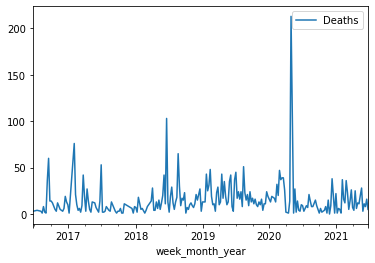

In [12]:
temp.plot(x='week_month_year')

In [13]:
print(temp.shape)


(232, 2)


# perform Data Pre-Processing on data and make  it ready time series model

In [14]:
temp.set_index('week_month_year', inplace=True)

In [15]:
temp.dtypes

Deaths    float64
dtype: object

In [16]:
data=temp.copy()

Check whether Data is stationery or not, if not make it stationery

In [17]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [18]:
adfuller(temp['Deaths'])

(-14.15693995906928,
 2.113561505295262e-26,
 0,
 231,
 {'1%': -3.4589796764641,
  '10%': -2.573482381701992,
  '5%': -2.8741347158661448},
 1897.2549426371677)

In [19]:
def adfuller_test(Temp):
  result = adfuller(Temp)
  labels = ['ADF Test stats' , 'p-value' , '#lags used', 'no of observations used']

  for value , label in zip(result , labels):
    print('{} : {}'.format(label , value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypo , henece we can reject the null hypo & data is stationary")
  else:
    print("weak evidence against the null hypo , henece we have failed to reject the null hypo & data is not stationary")

In [20]:
adfuller_test(temp['Deaths'])

ADF Test stats : -14.15693995906928
p-value : 2.113561505295262e-26
#lags used : 0
no of observations used : 231
Strong evidence against the null hypo , henece we can reject the null hypo & data is stationary


In [21]:
df = temp.copy()

In [22]:
#df['first_death_diff'] = df['Deaths']-df['Deaths'].shift(7)

 Examine if there is a seasonality in a data or not

In [23]:
temp['week'] = temp.index.week

In [24]:
temp['year'] = temp.index.year

In [25]:
temp.head()

,Deaths,week,year
week_month_year,,,
2016-06-20/2016-06-26,3.0,25,2016
2016-07-11/2016-07-17,4.0,28,2016
2016-08-01/2016-08-07,3.0,31,2016
2016-08-08/2016-08-14,1.0,32,2016
2016-08-15/2016-08-21,8.0,33,2016


In [26]:
pivot = temp.pivot_table(values='Deaths', index='week',columns='year')

In [27]:
pivot

year,2016,2017,2018,2019,2020,2021
week,,,,,,
1,NaN,1.0,7.0,13.0,16.0,1.0
2,NaN,NaN,2.0,13.0,13.0,6.0
3,NaN,NaN,18.0,13.0,19.0,5.0
4,NaN,NaN,NaN,43.0,18.0,1.0
5,NaN,76.0,5.0,25.0,17.0,37.0
6,NaN,21.0,6.0,31.0,13.0,16.0
7,NaN,10.0,NaN,48.0,32.0,12.0
8,NaN,4.0,1.0,19.0,20.0,36.0
9,NaN,6.0,4.0,10.0,47.0,23.0


Text(0, 0.5, 'Deaths')

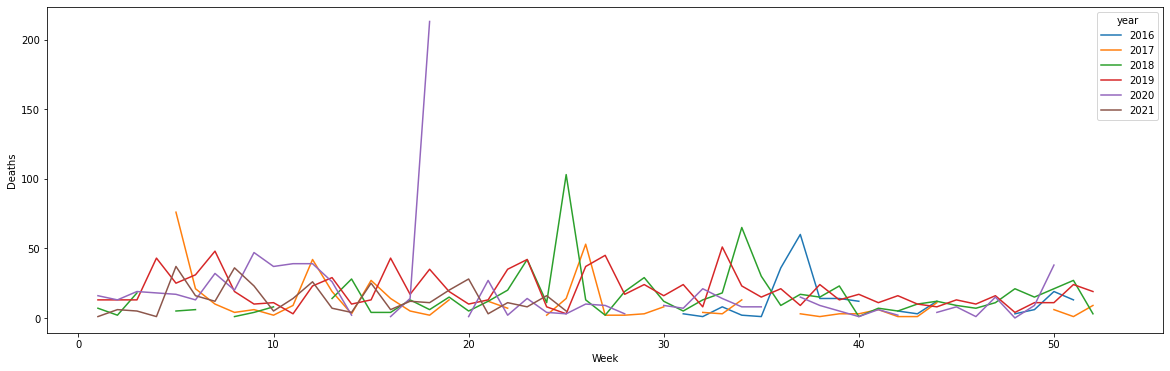

In [28]:
pivot.plot(figsize= (20,6))
plt.xlabel('Week')
plt.ylabel('Deaths')

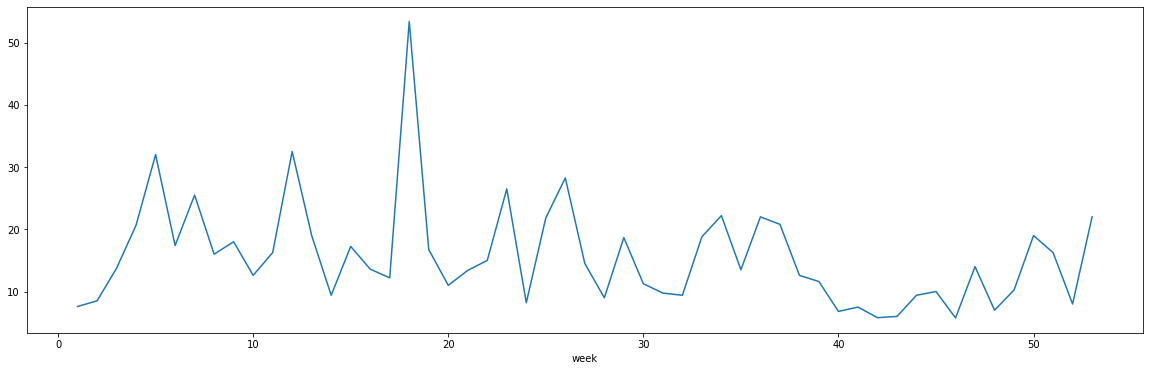

In [29]:
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize =(20,6))

Apply ARIMA on data

In [30]:
scaled_data = data.copy()



In [31]:
#min-max normalization
def normalize(data,min, max):
  for i in range(len(data)):
    data.iloc[i] =((data.iloc[i] - min )/(( max - min )))
  return data


In [32]:
#MIN-MAX denormalization
def denormalize(data,min,max):
  for i in range(len(data)):
    data.iloc[i] = data.iloc[i]*(max - min) + min
  return data 

In [33]:
#scaled_data['Deaths'] = scaler.fit_transform(data)
min = np.min(scaled_data['Deaths'])
max = np.max(scaled_data['Deaths'])
normalize(scaled_data ,min , max)


,Deaths
week_month_year,
2016-06-20/2016-06-26,0.014085
2016-07-11/2016-07-17,0.018779
2016-08-01/2016-08-07,0.014085
2016-08-08/2016-08-14,0.004695
2016-08-15/2016-08-21,0.037559
...,...
2021-05-24/2021-05-30,0.014085
2021-05-31/2021-06-06,0.051643
2021-06-07/2021-06-13,0.037559


In [34]:
#denormalize(scaled_data,min,max)


In [35]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

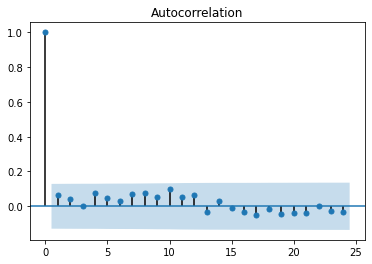

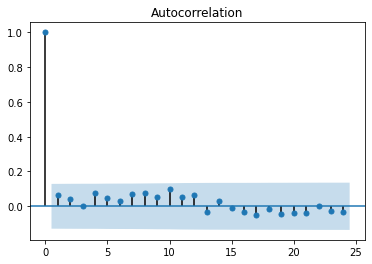

In [36]:
#plot_acf(data['Deaths'])
plot_acf(scaled_data)
#plot_acf(df['first_death_diff'])

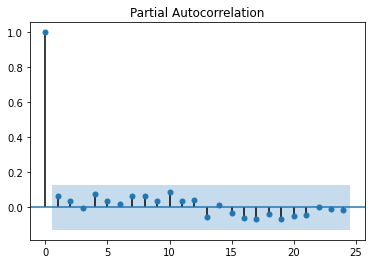

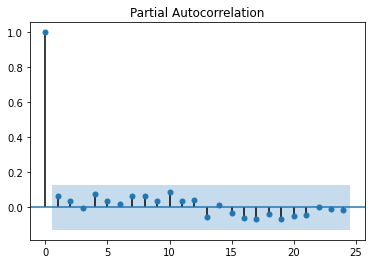

In [37]:
#plot_pacf(data['Deaths'])

plot_pacf(scaled_data)
#plot_pacf(df['first_death_diff'])

In [38]:
scaled_data.shape
#data.shape


(232, 1)

In [39]:
#training_data = data[:225]
#test_data = data[225:]

training_data = scaled_data[:225]
test_data = scaled_data[225:]
#training_data = df['first_death_diff'][:195]
#test_data = df['first_death_diff'][195:]

In [40]:
 from statsmodels.tsa.arima_model import ARIMA

In [41]:
import warnings
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

In [42]:


test_data



,Deaths
week_month_year,
2021-05-10/2021-05-16,0.093897
2021-05-17/2021-05-23,0.131455
2021-05-24/2021-05-30,0.014085
2021-05-31/2021-06-06,0.051643
2021-06-07/2021-06-13,0.037559
2021-06-14/2021-06-20,0.075117
2021-06-21/2021-06-27,0.023474


In [43]:
def evaluate_models(dataset,test_data, p_values, d_values, q_values):

  best_score = float("inf")
  best_cfg = None

  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p, d, q)
        try:
          
          arima = ARIMA(dataset,order=order)
          model = arima.fit()
          predictions = model.forecast(steps=len(test_data))[0]
          test = test_data['Deaths'].to_list()
          rmse =  np.sqrt(mean_squared_error(test, predictions))
          if rmse < best_score:
            best_score, best_cfg = rmse, order
            print('ARIMA%s RMSE=%.3f' % (order, rmse))
        except:
          continue

  print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
  return best_cfg

In [44]:
p_values = range(0, 4)
d_values = range(0, 1)
q_values = range(0, 4)
#warnings.filterwarnings("ignore")

order = evaluate_models(training_data,test_data, p_values, d_values, q_values)
print(order)

ARIMA(0, 0, 0) RMSE=0.041
ARIMA(1, 0, 1) RMSE=0.040


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ARIMA(3, 0, 1) RMSE=0.040


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

invalid value encountered in true_divide



ARIMA(3, 0, 2) RMSE=0.036
Best ARIMA(3, 0, 2) RMSE=0.036
(3, 0, 2)


In [45]:
#arima = ARIMA(training_data,order=(4,1,4))
arima = ARIMA(training_data,order=order)
model = arima.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning:

invalid value encountered in true_divide



Predict using ARIMA model

In [46]:
from sklearn import metrics

In [47]:
predictions = model.forecast(steps=len(test_data))[0]

In [48]:


def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100



In [49]:


pred = pd.DataFrame(predictions)
print("Predicted value")
denormalize(pred,min,max)
denormalize(test_data,min,max)



Predicted value


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Deaths
week_month_year,
2021-05-10/2021-05-16,20.0
2021-05-17/2021-05-23,28.0
2021-05-24/2021-05-30,3.0
2021-05-31/2021-06-06,11.0
2021-06-07/2021-06-13,8.0
2021-06-14/2021-06-20,16.0
2021-06-21/2021-06-27,5.0


In [50]:
print("RMSE")
print(np.sqrt(mean_squared_error(test_data, predictions)))
print("MSE")
print(metrics.mean_squared_error(test_data, predictions))
print("R2")
print(metrics.r2_score(test_data, predictions))
print("MAPE")
print(mape(test_data['Deaths'].to_list(), predictions))
print("MAE")
print(metrics.mean_absolute_error(test_data, predictions))

RMSE
7.73166431485288
MSE
59.77863307756946
R2
0.12090245474162575
MAPE
100.72315817170012
MAE
6.9590023775462315


In [54]:

xticks = [tick.strftime('%d-%m-%Y') for tick in test_data.index.tolist()]


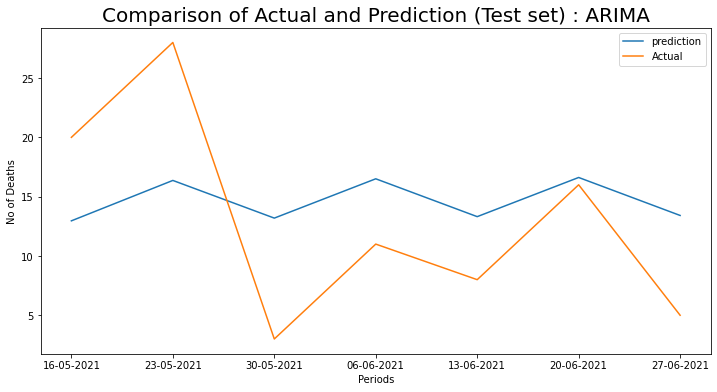

In [55]:
# print("Actual value : {}".format(test_data['Deaths'].to_list()))
# print("predicted value: {}".format(pred[0].to_list()))


import matplotlib.pyplot as plt

fig , ax = plt.subplots(figsize=(12,6))
ax.plot(pred)
ax.plot(test_data['Deaths'].to_list())
plt.title("Comparison of Actual and Prediction (Test set) : ARIMA",size=20)
plt.ylabel("No of Deaths")
plt.xlabel("Periods")
plt.xticks(np.arange(len(xticks)), xticks)
plt.legend(['prediction', 'Actual'])
plt.show()